# Telecom Customer Chrun Analysis

In [2]:
import pandas as pd # used for data manipulation and data loading

import numpy as np # used numerical calculation

import matplotlib.pyplot as plt # used for visualization
%matplotlib inline

import seaborn as sns # advanced visulization

import plotly.express as px # designed for creating interactive visualizations with minimal code

from ydata_profiling import ProfileReport  # to create profile report

In [3]:
# load the dataset
df=pd.read_csv("C:\\Users\\Abc\\Downloads\\WA_Fn-UseC_-Telco-Customer-Churn.csv") # read csv file using read_csv
df 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.head() # get first 5 rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.tail() # get last 5 rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [6]:
df.info() # to get information of all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- **There are 7043 record in each column.**
- **There are no missing values.**
- **The 'Customer_ID','gender','Department','Partener','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineSecurity', 'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling'and 'PaymentMethod' This all columns have object data type.**
- **The 'SeniorCitizen' and 'tenure' this two column having integer data type.**
- **'MonthlyCharges' this column have float data type.**

In [8]:
df.shape # it return number of rows and column

(7043, 21)

**There are 7043 rows and 21 columns are present.**

In [10]:
df.isnull().sum() # check missing value 

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**The dataset don't have any missisng values.**

In [12]:
df.duplicated().sum() # check duplicate value

0

**The dataset does not contain any duplicates values.**


In [14]:
df.nunique() # get unique values in all columns

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [15]:
df.nunique().sum() # it return total count of unique value of whole dataset

15277

**There are  total 15277 unique values in whole dataset.**

In [17]:
df.dtypes # it return data type of each column

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [18]:
df.describe() # to get summary of statistical column

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## **1.SeniorCitizen**
- **The total records in this column is 7043,i.e no missing values are present.**
- **The mean/average of senior citizen column is 0.1621.**
- **Standard deviation is 0.36 which is greater than mean.**
- **The minimum value of senior citizen are 0.**
- **There are 0 sinior citizen person are 25% ,no data fall in 25%.**
- **The mid value is 0.**
- **75% value is 0.**
- **The maximum value is 1.**

## **2.Tenure**
- **The total count of this column is 7043.**
- **The mean/average of tenure column is 32.37,the average around is 32**
- **The standard deviation is 24.55 which is less than mean.**
- **The minimum value is 0.**
- **25% value is 9 i.e 25% customer whose work in company.**
- **The middle value is 29.**
- **75% value is 55 customer whose work in company.**
- **The maximum 72 year customer work in company.** 

In [20]:
df.describe(include='all') # to get summary of both statistical and categorical data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


## **1.CustomerID**
- The total count of customer id is 7043.
- 7043 unique id's are present present.
- The top / first id is '7509-VHVEG'.

## **2.Gender**
- There are 7043 entries in gender column.
- 2 unique genders are present (Male,Female).
- The top most gender is 'Male'.
- 'Male' this gender are 3555 times are repeated.

## **3.partner**
- The total count of partner is 7043.
- There are 2 unique values are present(Yes,No).
- The top most value is 'No'.
- The frequency of 'No' is 3641.

## **4.Dependants**
- The total count of this column is 7043.
- There are 2 unique value are present(Yes,No).
- The top most value is 'No'.
- 'No' is 4933 times reapeated.

## **5.PhoneService**
- The total count of phone service is 7043.
- There are 2 unique phone service are present(Yes,No).
- The top most count value is 'Yes'.
- 'yes' are 6361 times are repeated.

## **6.MultipleLines**
- The total entries in this column is 7043.
- There are 3 unique multiple lines are present(Yes,No,No phone service).
- The top most value is 'No'.
- The frequency of 'No' is 3390.

## **7.InternetService**
- The total of internet service is 7043.
- There are 3 unique internet services are present like DSL,No,Fiber optic.
- The top most/popular internet service is 'Fiber optic'.
- The frequency of 'Fiber optic' is 3096.

## **8.OnlineSecurity**
- The total count  of online security is 7043.
- There are 3 unique values are present like Yes,No and No internet service.
- The top online security is No.
- The frequency of No is 3498.

## **9.DeviceProtection**
- The total entries in this column is 7043.
- 3 unique value of device protection are represent (Yes,No,No internet service).
- The top most value is No.
- The frequency of No is 3095.

## **10.TechSupport**
- The total count of tech support is 7043.
- 3 unique value of tech support are represent (Yes,No,No internet service).
- The top most value is No.
- The frequency of No is 3473.

## **11.StreamingTV**
- The total entries in this column is 7043.
- 3 unique value of streamingTV are represent (Yes,No,No internet service).
- The top most value is No.
- The frequency of No is 2810.

## **12.StreamingMovies**
- The total entries in this column is 7043.
- 3 unique value of streamingMovies are represent (Yes,No,No internet service).
- The top most value is No.
- The frequency of No is 2785.

## **13.Contract**
- The total count of contract is 7043.
- 3 unique contrat are represent like month-to-month,one year,two year
- The top most contract value is month-to-month.
- The frequency of No is 3875.

## **14.PaperlessBilling**
- The total count is 7043.
- There are 2 unique values are present (Yes,No).
- The top value is Yes.
- Frequency of Yes is 4171.

## **15.PaymentMethod**
- The total payment method count is 7043.
- There are 4 unique payment methods are present like Electronic check,Mailed check,Bank transfer(automatic) and credit card(automatic).
- The top method is Electronic check.
- The frequency is 2365.

## **16.Churn**
- The total count  of churn is 7043.
- There are 2 unique values are present (Yes,No).
- The top value is No.
- Frequency of No is 5174 .

In [22]:
df.drop(['customerID'],axis=1,inplace=True) # remove customer_id column

In [23]:
df['gender'].unique() # get unique values in gender column

array(['Female', 'Male'], dtype=object)

**There are 2 unique genders are present (Male,Female).**

In [25]:
df['Partner'].unique() # get unique values in partner column

array(['Yes', 'No'], dtype=object)

**There are 2 unique values are present(Yes,No).**

In [27]:
df['Contract'].unique() # get unique values in contract column

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

**3 unique contrat are represent like month-to-month,one year,two year.**

In [29]:
df['PaymentMethod'].unique() # get unique values in payment method column

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

**There are 4 unique payment methods are present like Electronic check,Mailed check,Bank transfer(automatic) and credit card(automatic).**

In [31]:
df['InternetService'].unique() # get unique value in internet service column

array(['DSL', 'Fiber optic', 'No'], dtype=object)

**There are 3 unique internet services are present like DSL,No,Fiber optic.**

In [33]:
df[df['InternetService']=='Fiber optic'] # shows the record whose internet service is fiber optic

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7034,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,Male,0,No,No,19,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [34]:
df[df['PaymentMethod']=='Electronic check'] # this shows the record of paymentthod is electronic check

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
14,Male,0,No,No,25,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.4,No
7029,Female,1,No,No,6,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,No
7032,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7036,Female,0,No,No,12,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No


In [35]:
df[df['MonthlyCharges'] > 20]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [36]:
df[df['MonthlyCharges']==0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


**There are no values are found whose Monthly charges are 0.**

In [38]:
df.sort_values(by="TotalCharges",ascending=False) # sort the Total charges by ascending order

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2845,Female,0,No,No,11,Yes,No,Fiber optic,No,Yes,Yes,Yes,No,Yes,Month-to-month,Yes,Electronic check,94.20,999.9,No
3353,Male,0,Yes,No,12,Yes,No,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),85.05,999.8,No
3686,Female,0,No,No,13,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,75.00,999.45,Yes
5598,Female,0,Yes,Yes,55,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.15,998.1,No
6646,Male,0,Yes,Yes,51,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.40,997.75,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No


In [39]:
df.columns # to get column name

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [40]:
df['gender'].value_counts() # to get count of gender column

gender
Male      3555
Female    3488
Name: count, dtype: int64

- The total count of 'Male' is 3555 and 'Female' is 3488.

In [42]:
df['Contract'].value_counts() # to get count of each contract

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

- The count of Month-to-month is 3875.
- The total count of Two year contract is 1695.
- The count of One year contract is 1473.

In [44]:
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

- The total count of Electronic check payment method is 2365.
- The count of Mailed check is 1612.
- The count of Bank transfer (automatic) payment method is 1544.
- The total value count of credit card is 1522.

In [46]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

- The count of Fiber optic is 3096.
- The count of DSL is 2421.
- The count of No is 1526.

In [48]:
# calculate the average of contract by its Monthly charges
df.groupby("Contract")["MonthlyCharges"].mean() 

Contract
Month-to-month    66.398490
One year          65.048608
Two year          60.770413
Name: MonthlyCharges, dtype: float64

- The average of Month to Month contract is 66.39.
- The average of One year contract around 65.
- The average of Two year contract is 60.

In [50]:
df.index # it return the row index

RangeIndex(start=0, stop=7043, step=1)

In [51]:
profile=ProfileReport(df)   # create profile report
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 22.76it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [52]:
# check the duplicates in Payment Method column
df['PaymentMethod'].duplicated().sum()

7039

- There are 7039 duplicate record are present.

# EDA (Explorotory Data Analysis)
- **EDA is essential because it helps you understand your data before applying any models, visualizations, or business decisions.**

# **Types of EDA**

# **1.Univariate Analysis**
- **Analyzing and comparing a single feature(column) within itself.**

# **2.Bivariate Analysis**
- **Analyzing and comparing a two features in order to find there relationship,underlying pattern and trends between them.**

# **3.Multivariate Analysis**
- **Analyzing and comparing more than two feature in order to find the relationship,trends,dependncies between them.**

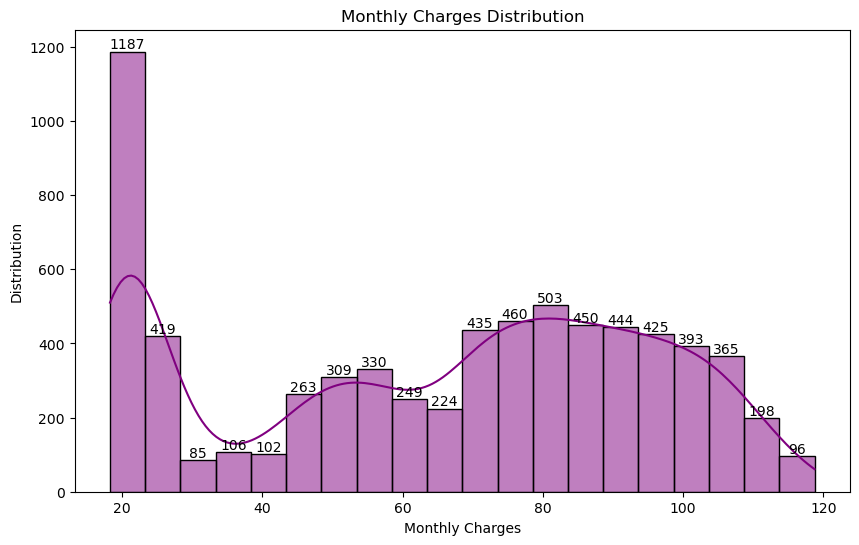

In [55]:
# histplot for Monthly charges distribution
plt.figure(figsize=(10,6))
ax=sns.histplot(df['MonthlyCharges'],bins=20,kde=True,color='purple')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Monthly Charges Distribution")
plt.xlabel("Monthly Charges")
plt.ylabel("Distribution")
plt.show()   

## Monthly Charges Distribution
- The graph shows the Monthly charges distribution.
- The largest customer is 1187 paying around 20 to 25 per month.
- The few customer are pay between 30-50 per month.
- Then after more customer are pay between 70-100 per month.


In [57]:
import warnings
warnings.filterwarnings('ignore')

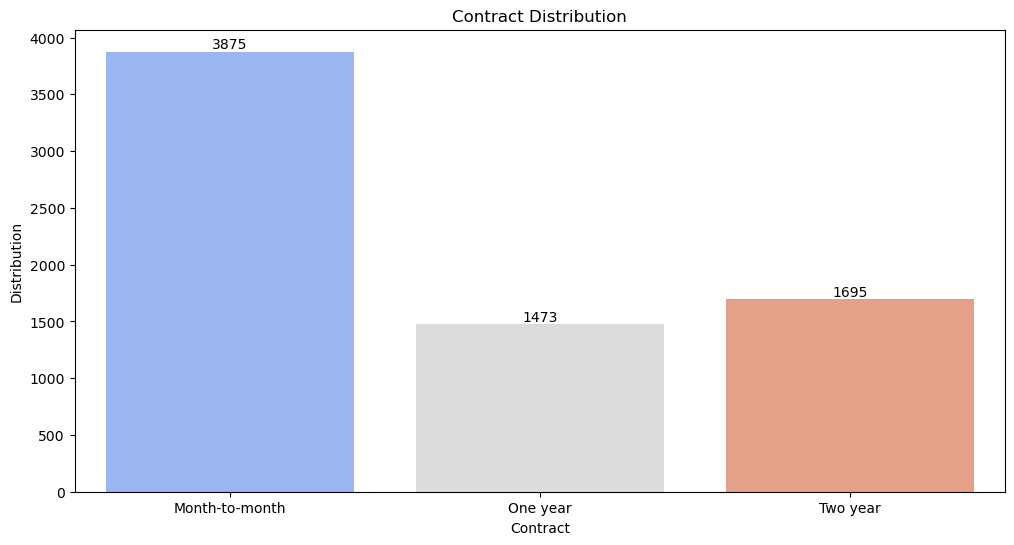

In [58]:
#count for contract distribution
plt.figure(figsize=(12,6))
ax=sns.countplot(x=df['Contract'],palette='coolwarm')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Contract Distribution")
plt.xlabel("Contract")
plt.ylabel("Distribution")
plt.show()   

## Contract Distribution
- The Highest count of contract is 'Month-to-Month' (3875).
- The lowest count is 'One year' contract which is 1473.
- The count of 'Two year' is 1695 which is second lagest contract.


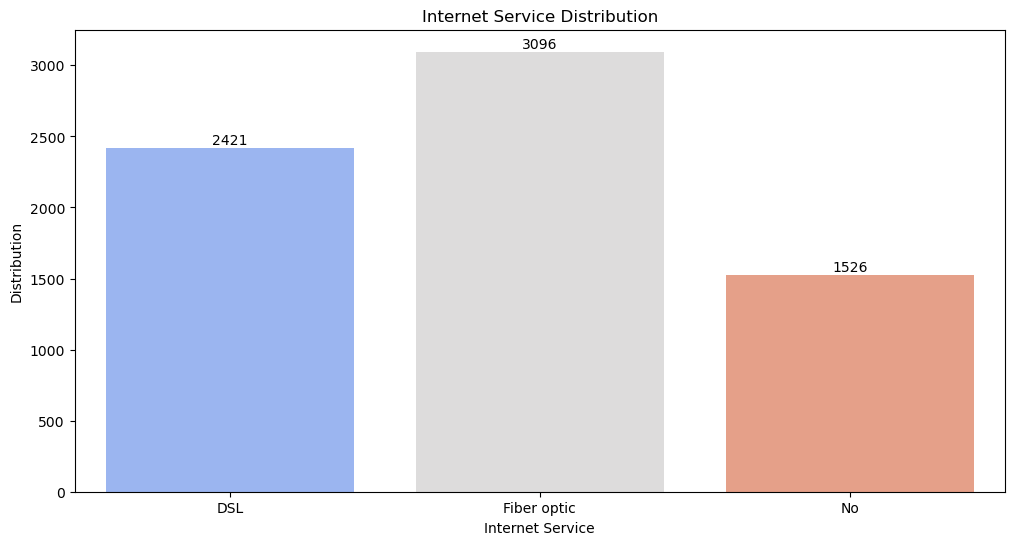

In [60]:
#count for Internet Service distribution
plt.figure(figsize=(12,6))
ax=sns.countplot(x=df['InternetService'],palette='coolwarm')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Internet Service Distribution")
plt.xlabel("Internet Service")
plt.ylabel("Distribution")
plt.show()   

## Internet Service Distribution
- This graph shows the distribution of Internet service.
- x-axis shows the internet service name.
- y-axis shows the counts.
- The highest count of internet service is Fiber optic (3096).
- The second largest count of internet service is DSL (2421).
- The lowest count is No (1526).

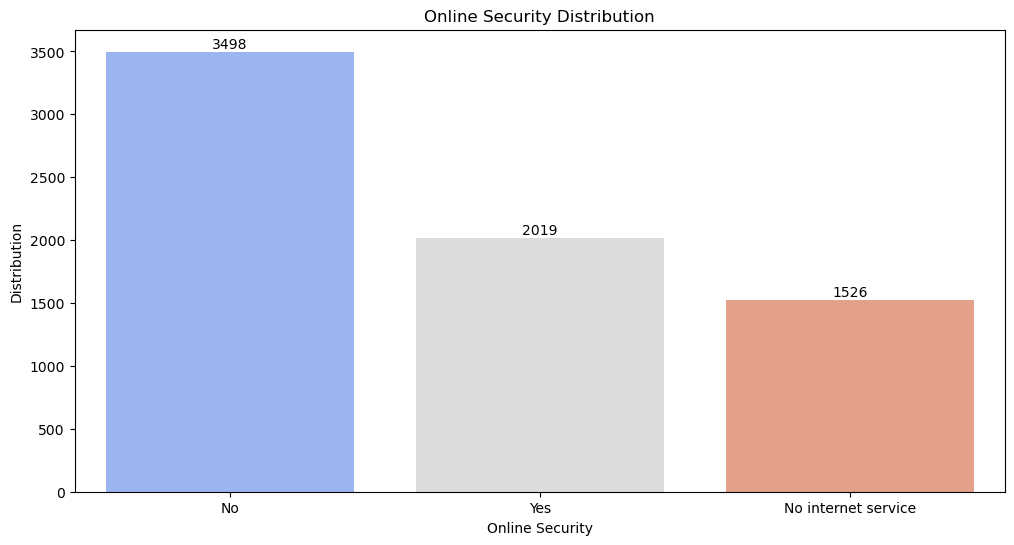

In [62]:
#count for Online Security distribution
plt.figure(figsize=(12,6))
ax=sns.countplot(x=df['OnlineSecurity'],palette='coolwarm')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Online Security Distribution")
plt.xlabel("Online Security")
plt.ylabel("Distribution")
plt.show()   

## Online Security Distribution
- This graph shows the distribution of online security.
- The highest count is No(3498) .
- The count of Yes(2019) is greater No internet service(1526).


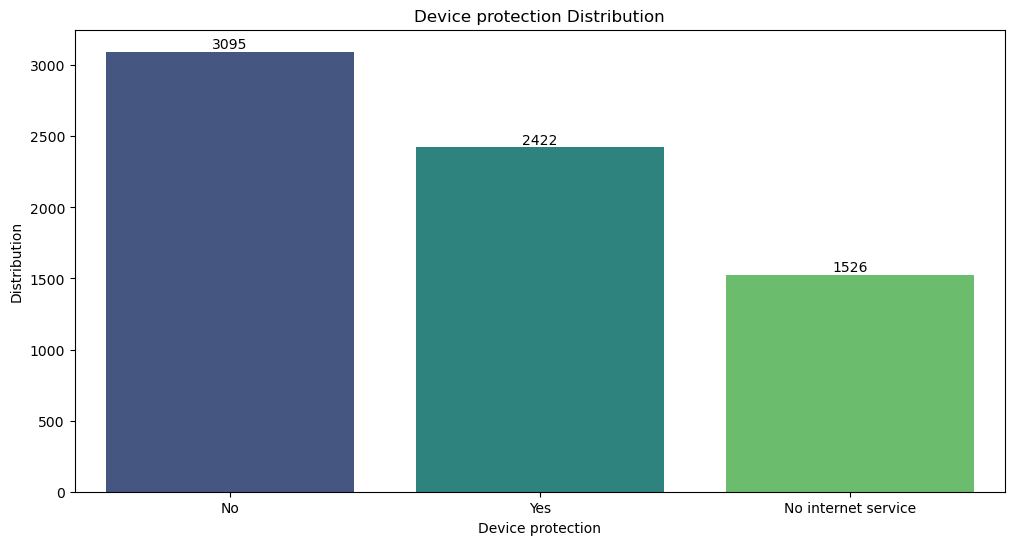

In [64]:
#count for Device protection distribution
plt.figure(figsize=(12,6))
ax=sns.countplot(x=df['DeviceProtection'],palette='viridis')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Device protection Distribution")
plt.xlabel("Device protection")
plt.ylabel("Distribution")
plt.show()   

## Device protection Distribution
- The highest count is 'No' (3095) i.e more cutomer who have no any device protection.
- Then 2455 customers who have device protection.
- The less customer who have no intenet service(1526).

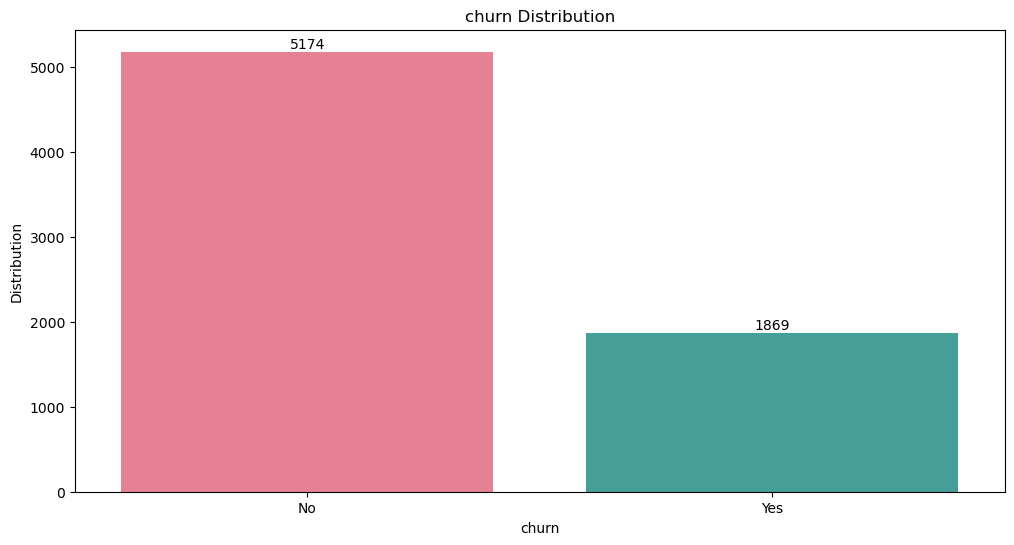

In [66]:
#count for churn distribution
plt.figure(figsize=(12,6))
ax=sns.countplot(x=df['Churn'],palette='husl')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("churn Distribution")
plt.xlabel("churn")
plt.ylabel("Distribution")
plt.show()   

## Churn Distribution
- 5174 customer have stayed with the company non churned.
- 1869 customer have churn they left the service. 

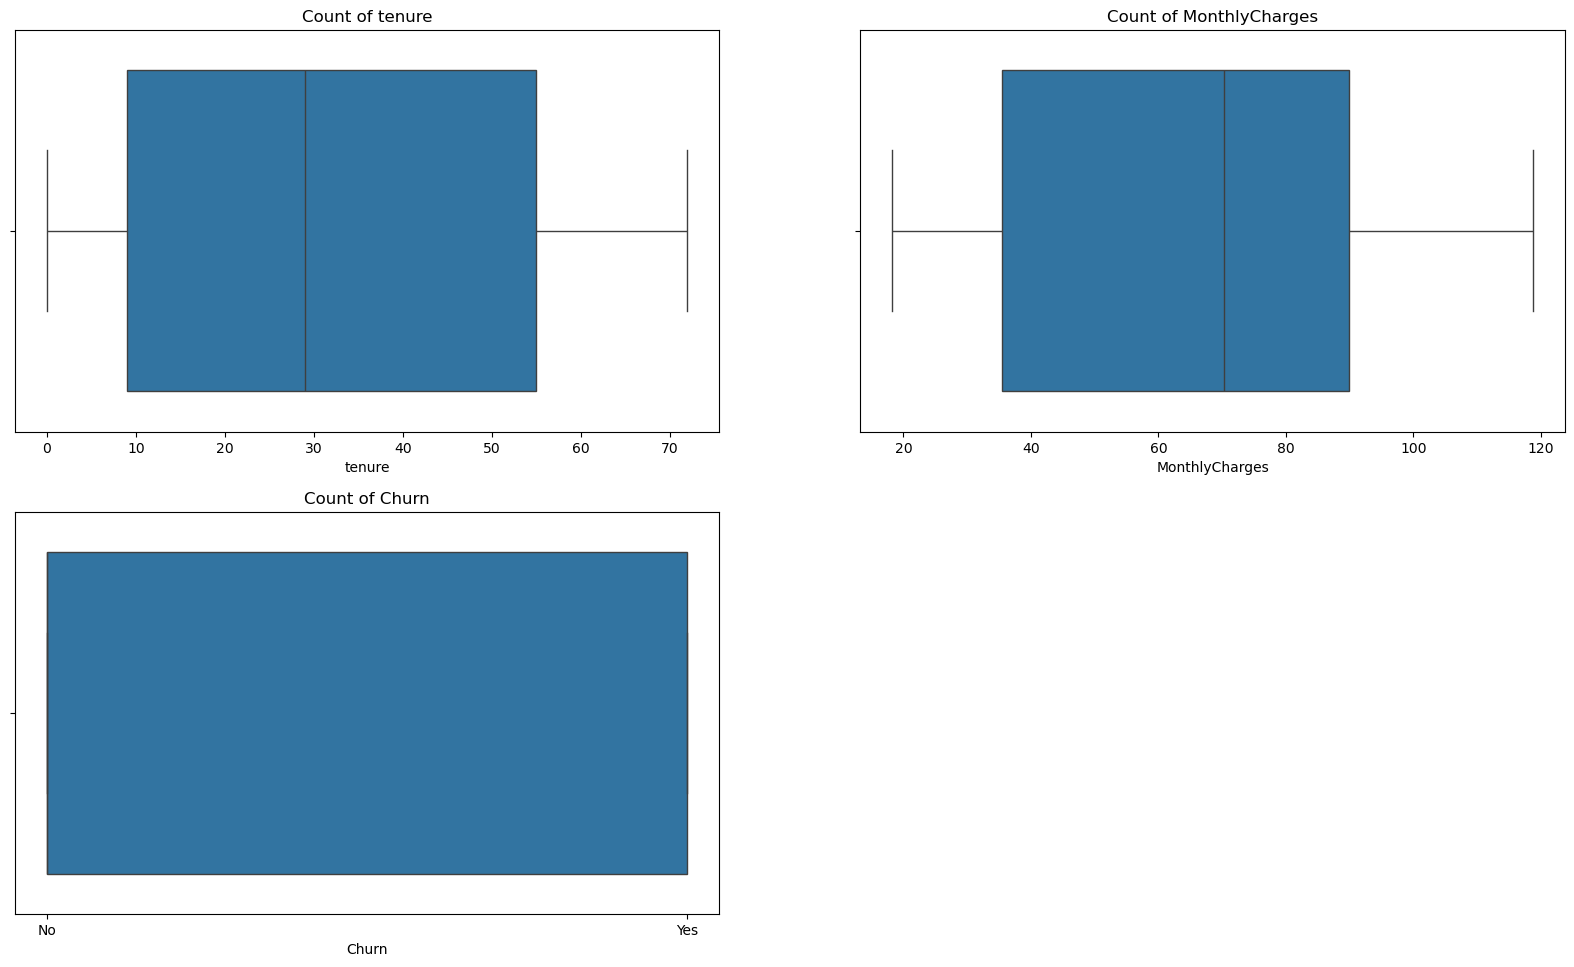

In [68]:
# box plot 
x=['tenure','MonthlyCharges','Churn']
def univariate_analysis(n):
    plt.figure(figsize=(20, 24))
    for i, col in enumerate(n, 1):
        plt.subplot(4,2,i)
        plt.title(f"Count of {col}")
        sns.boxplot(x=df[col])
    plt.show()

univariate_analysis(x)

- There are no outlier are present.

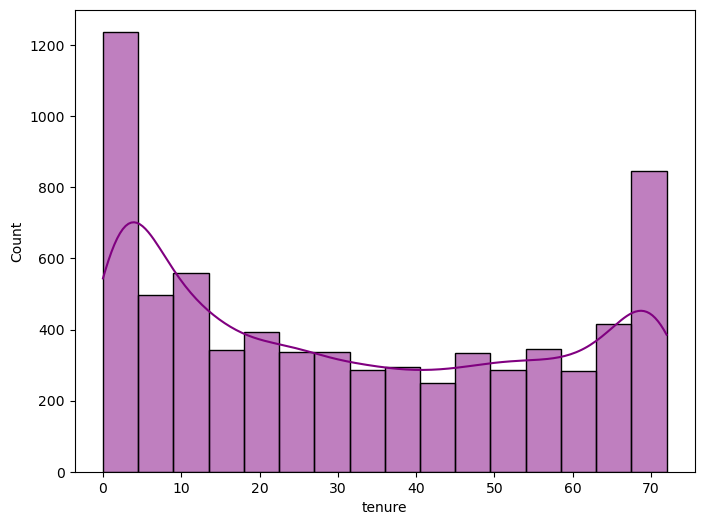

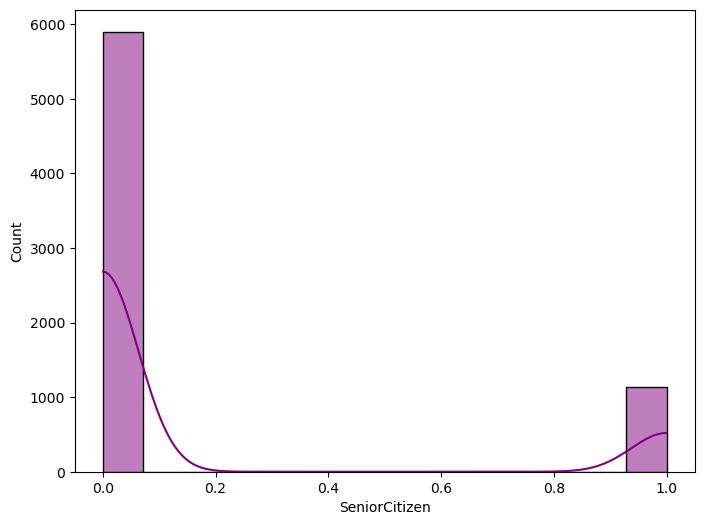

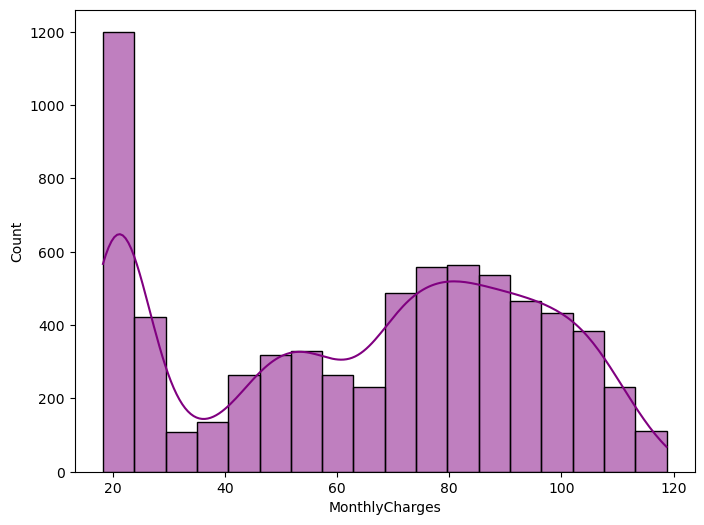

In [70]:
#using for loop  univariate
numerical_col=['tenure','SeniorCitizen','MonthlyCharges']
for i in numerical_col:
    plt.figure(figsize=(8,6))
    sns.histplot(x=i,data=df,color='purple',kde=True)
    plt.show()

## Tenure
- The highest value of tenure around 0-5 that indicating many customer have work in company.
- The count of customer generally decrease as tenure after 5 to 60.
- The count is slightly increase after the 60-70.

## Senior Citizen
- The highest count of the customer are value(0.0) on x-axis with a count of approximately 6000.
- A lowest count of customer is around 1.0 on x-axis with count of around 1000

## Monthly Charges
- A x-axis shows the monthly charges range start from 0-120.
- The y-axis shows the count of customers and range start from 0-1200.
- The highest count is around 20.
- The count is slightly decreases 40 then it increase after 40 .and after 60 the count is increases upto 100.
- Then count of customers suddenly decreases 120.



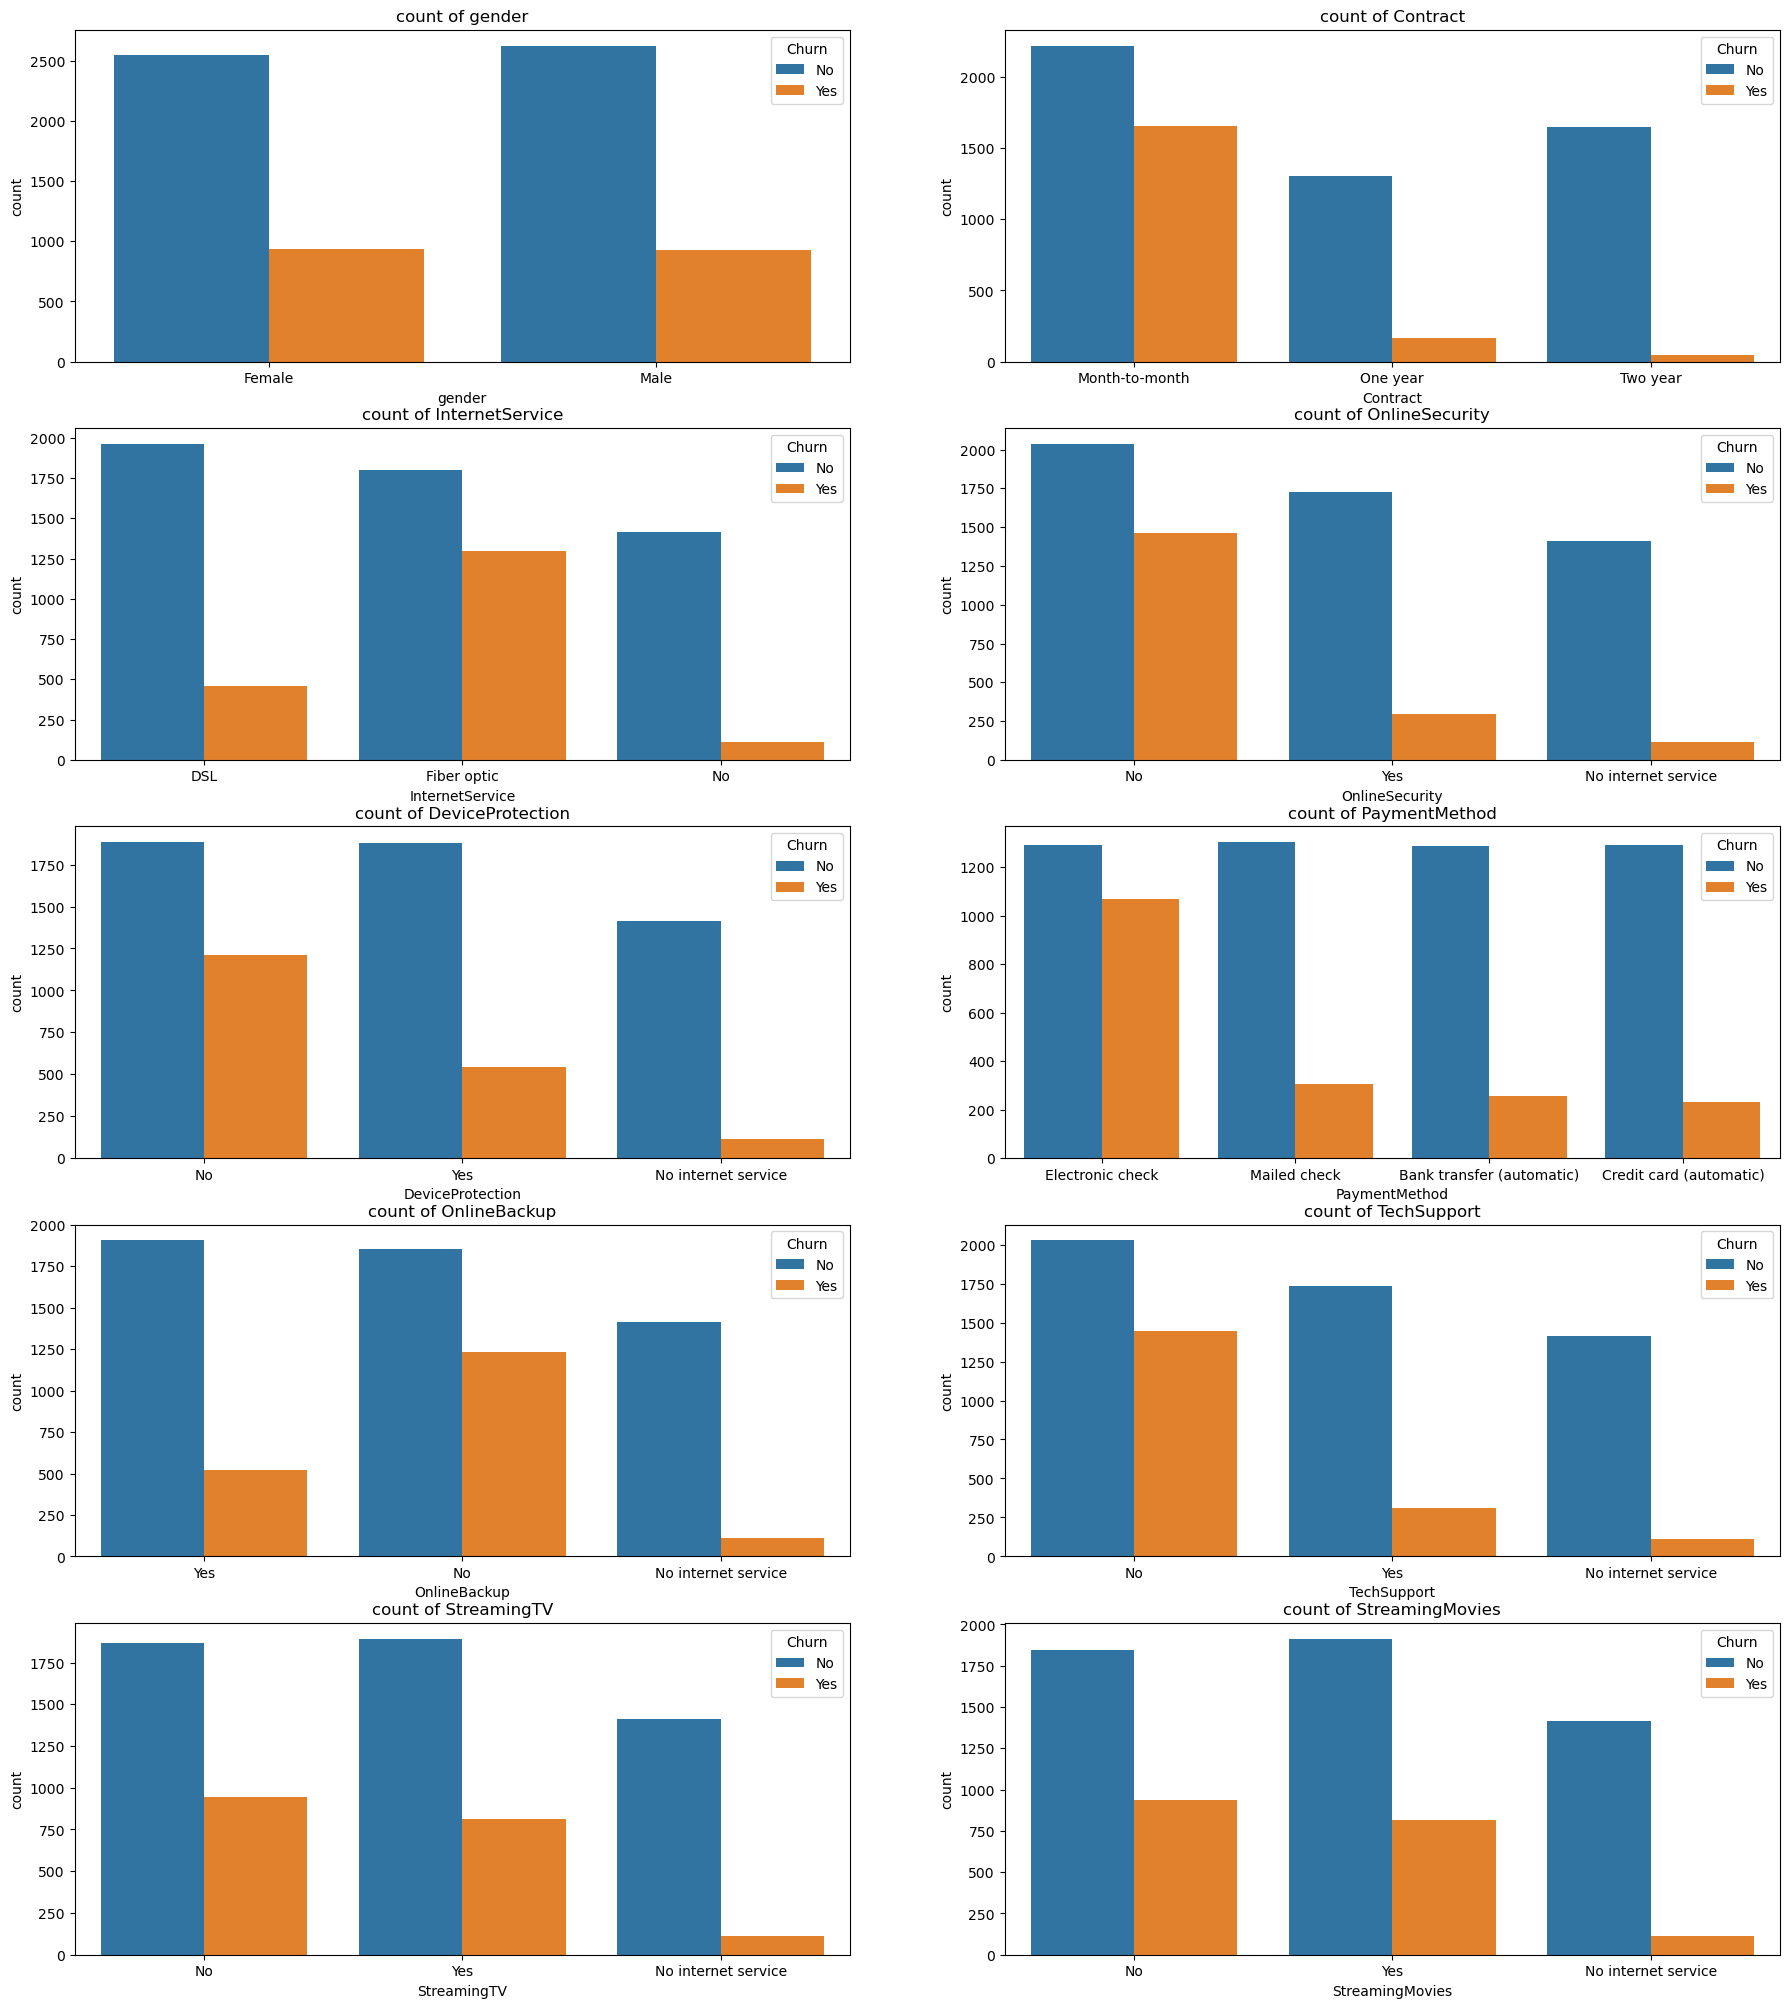

In [72]:
cat_col=['gender','Contract','InternetService','OnlineSecurity','DeviceProtection','PaymentMethod','OnlineBackup','TechSupport','StreamingTV','StreamingMovies']
def bivariate_analysis(n):
    plt.figure(figsize=(22,25))
    for i,col in enumerate(n,1):
        plt.subplot(5,2,i)
        plt.title(f"count of {col}")
        sns.countplot(x=df[col],hue='Churn',data=df)
    plt.show()
bivariate_analysis(cat_col)

## Gender
- The count Male and Female both are high who haven't churned.
- The count of Female customers are slightly higher than who have left the company.

## Contract
- The highest count is Month-to-month contract customer who no left the company other than another contract.
- less customer in month-to month contract who left the company.
- In one year contract the count of whose customer not left the company is greater than customer left the company.
- Two year contract the count those customer who haven't left the company and very few customer who left the company.

## Internet Service
- In DSL internet service the count of those customer who haven't left the company is greater than whose customer are left the company.
- In Fiber optic the count customer who haven't left the company is greater than whose customer are left the company.
- No internet service customer who haven't left the company is greater than whose customer are left the company.

## Online Security
- The count of 'No' online security whose customer haven't left the company greater than those customer left the company.
- The count of 'yes' online security whose customer haven't left the company greater than those customer left the company.
- The Internet service  the count of no churn are greater than yes churn.

## Device protection
- In 'No' device protection the count of No chrun is greater than yes churn.
- In 'Yes' device protection the count of No chrun is greater than yes churn.
- In 'No internet service' device protection the count No churn is greater than yes churn.

## PaymentMethod
- In 'Electronic check' payment method the count of those customer who haven't left the company is greater than the customer who left the company.
- In 'Mailed check' the count of those customer who haven't left the company is greater than the customer who left the company.
- In 'Bank transfer (automatic)' the count of those customer who haven't left the company is greater than the customer who left the company(very few customer are left the company).
- In 'credit card (automatic)' the count of those customer who haven't left the company is greater than the customer who left the company.

## Online Backup
- The customer who have get online backup the count of those customer who haven't left the company is greater than who left the company.
- The customer who have no any online backup the count of those customer who haven't left the company is greater than who left the company.
- In No internet service the count of no churn is greater than yes churn.

## Techsupport
- The customer who have get technical support the count of those customer who haven't left the company is greater than who left the company.
- The customer who have no any technical support the count of those customer who haven't left the company is greater than who left the company.
- In No internet service the count of no churn is greater than yes churn.

## StreamingTV
- In No streaming TV the count of No churn is greater than yes churn.
- In yes streaming TV the count of No churn is greater than yes churn.
- In No internet service streaming Tv the count of no churn is greater than yes churn.

## Streaming Movies
- In No streaming Movies the count of No churn is greater than yes churn.
- In yes streaming Movies the count of No churn is greater than yes churn.
- In No internet service streaming Movies the count of no churn is greater than yes churn.


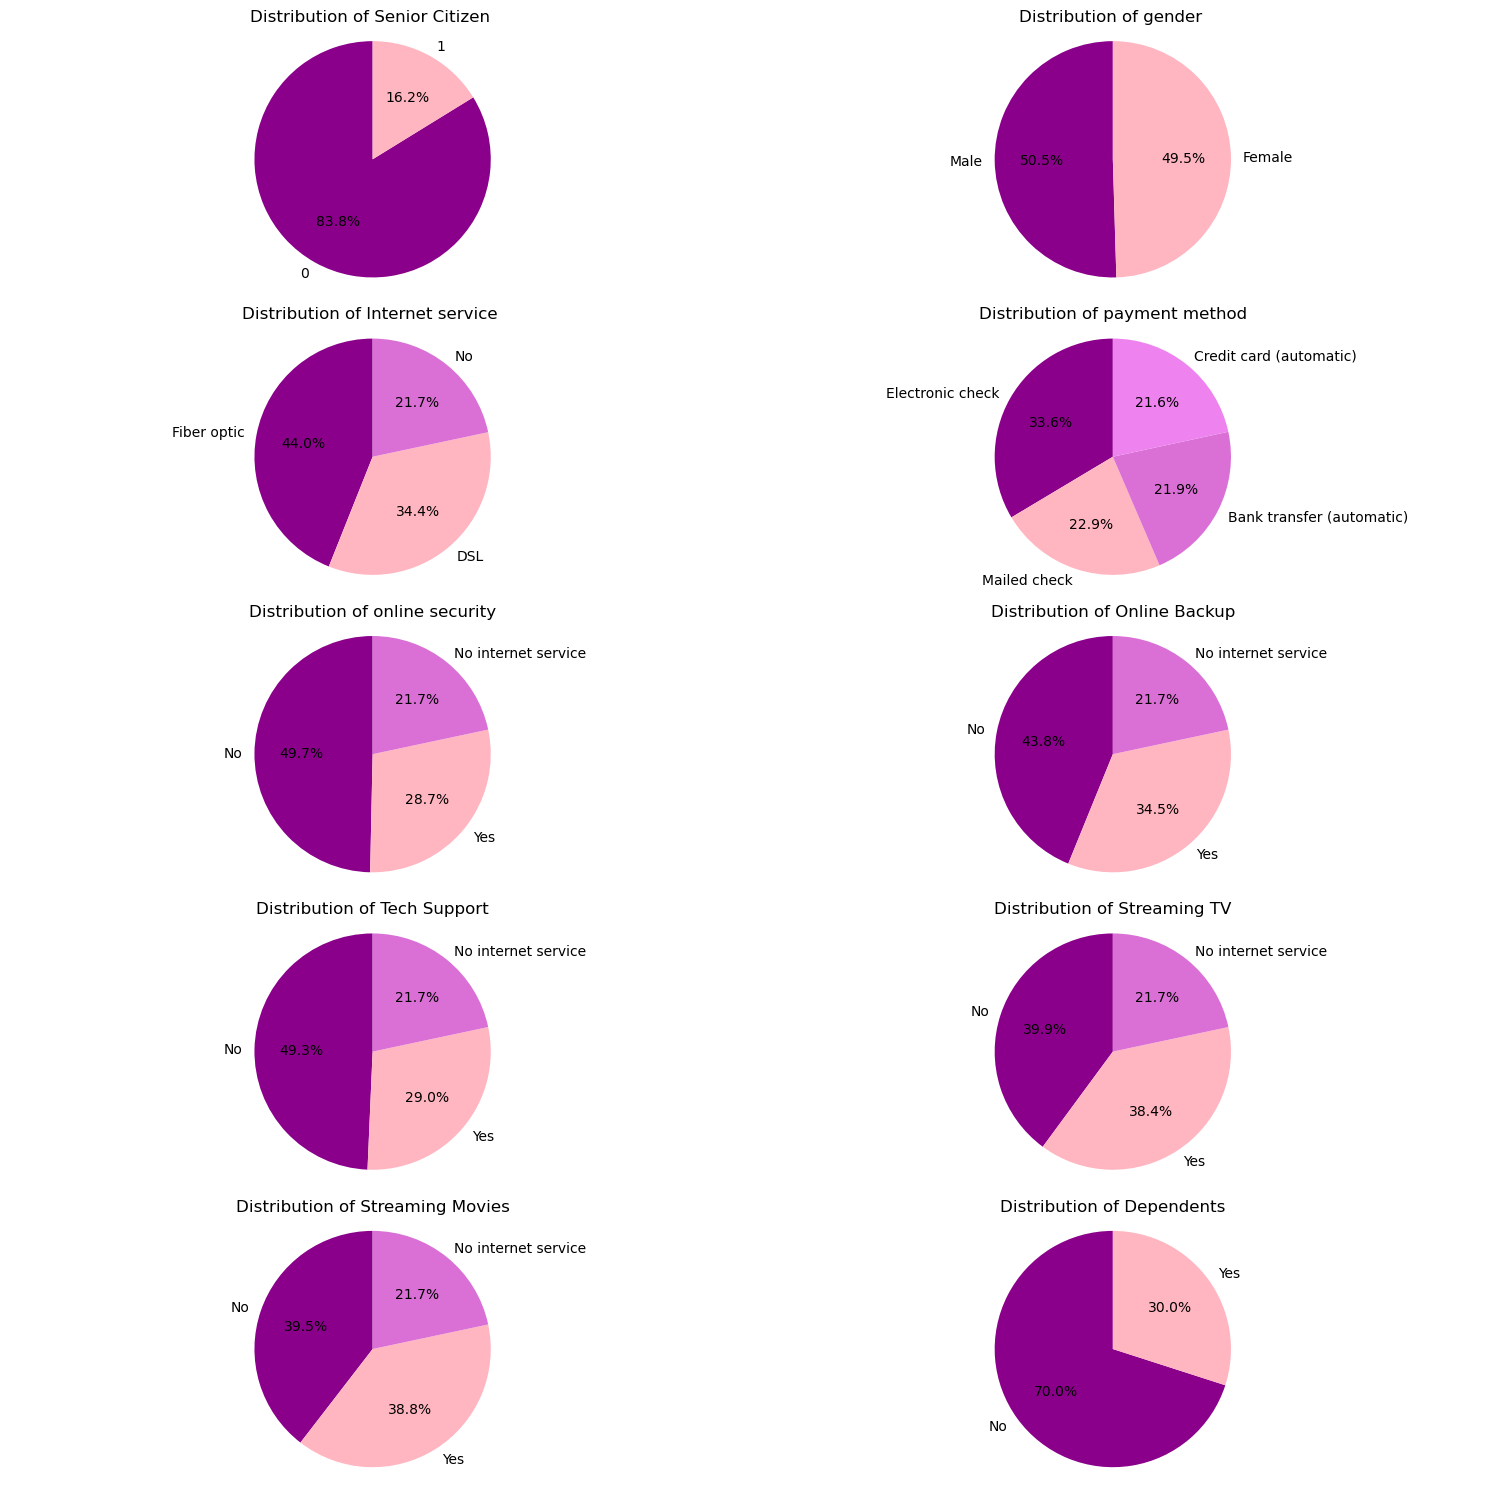

In [74]:
plt.figure(figsize=(15,15))

# pie chart for senior citizen
plt.subplot(5,2,1)
outcome_counts = df['SeniorCitizen'].value_counts()
custom_colors = ['darkmagenta','lightpink']
plt.pie(outcome_counts, labels = outcome_counts.index, autopct='%1.1f%%', colors = custom_colors, startangle = 90)
plt.title('Distribution of Senior Citizen ')
plt.axis('equal')  

# pie chart for gender
plt.subplot(5,2,2)
outcome_counts = df['gender'].value_counts()
custom_colors = ['darkmagenta','lightpink']
plt.pie(outcome_counts, labels = outcome_counts.index, autopct='%1.1f%%', colors = custom_colors, startangle = 90)
plt.title('Distribution of gender ')
plt.axis('equal')  

# pie chart for internet service
plt.subplot(5,2,3)
outcome_counts = df['InternetService'].value_counts()
custom_colors = ['darkmagenta','lightpink','orchid']
plt.pie(outcome_counts, labels = outcome_counts.index, autopct='%1.1f%%', colors = custom_colors, startangle = 90)
plt.title('Distribution of Internet service ')
plt.axis('equal') 

# pie chart for Payment method
plt.subplot(5,2,4)
outcome_counts = df['PaymentMethod'].value_counts()
custom_colors = ['darkmagenta','lightpink','orchid','violet']
plt.pie(outcome_counts, labels = outcome_counts.index, autopct='%1.1f%%', colors = custom_colors, startangle = 90)
plt.title('Distribution of payment method')
plt.axis('equal') 

# pie chart for online security
plt.subplot(5,2,5)
outcome_counts = df['OnlineSecurity'].value_counts()
custom_colors = ['darkmagenta','lightpink','orchid']
plt.pie(outcome_counts, labels = outcome_counts.index, autopct='%1.1f%%', colors = custom_colors, startangle = 90)
plt.title('Distribution of online security')
plt.axis('equal') 

# pie for online backup
plt.subplot(5,2,6)
outcome_counts = df['OnlineBackup'].value_counts()
custom_colors = ['darkmagenta','lightpink','orchid']
plt.pie(outcome_counts, labels = outcome_counts.index, autopct='%1.1f%%', colors = custom_colors, startangle = 90)
plt.title('Distribution of Online Backup')
plt.axis('equal') 

# pie chart for Tech support
plt.subplot(5,2,7)
outcome_counts = df['TechSupport'].value_counts()
custom_colors = ['darkmagenta','lightpink','orchid']
plt.pie(outcome_counts, labels = outcome_counts.index, autopct='%1.1f%%', colors = custom_colors, startangle = 90)
plt.title('Distribution of Tech Support')
plt.axis('equal') 

# pie chart for Streaming tv
plt.subplot(5,2,8)
outcome_counts = df['StreamingTV'].value_counts()
custom_colors = ['darkmagenta','lightpink','orchid']
plt.pie(outcome_counts, labels = outcome_counts.index, autopct='%1.1f%%', colors = custom_colors, startangle = 90)
plt.title('Distribution of Streaming TV')
plt.axis('equal') 

# pie chart for streaming Movies
plt.subplot(5,2,9)
outcome_counts = df['StreamingMovies'].value_counts()
custom_colors = ['darkmagenta','lightpink','orchid']
plt.pie(outcome_counts, labels = outcome_counts.index, autopct='%1.1f%%', colors = custom_colors, startangle = 90)
plt.title('Distribution of Streaming Movies')
plt.axis('equal') 

# pie chart for phoneservice
plt.subplot(5,2,10)
outcome_counts = df['Dependents'].value_counts()
custom_colors = ['darkmagenta','lightpink']
plt.pie(outcome_counts, labels = outcome_counts.index, autopct='%1.1f%%', colors = custom_colors, startangle = 90)
plt.title('Distribution of Dependents')
plt.axis('equal') 




plt.tight_layout()
plt.show()

## Distribution of SeniorCitizen
- The total 16.2 % customers are senior citizens.
- The 83.8% customers are not senior citizens.

## Distribution of Gender
- There are 50.5% Male customers.
- There are 49.5% customers are Female.

## Distribution of Internet Service
- The total 44% of fiber optic which is highest internet service.
- The count of DSL  is 34.4% this is a second largest internet service.
- The total of No is 21.7% of internet service which is lowest internet service.

## Distribution of payment Method
- Total 33.6% customers who payment by Electronic check this is highest payment method.
- Total 22.9% customers who use Mailed check payment method.
- The 21.9% customers payment by using Bank transfer (automatic).
- The 21.6% customers using credit card (automatic) for payment.

## Distribution of Online Security
- Total 49.7% customers who have not online security.
- Total 28.7% customers have online security.
- 21.7% customers who no internet service.

## Distribution of Online Backup
- Total 43.8% customers does not any online backup.
- Total 34.5% customers have online backup.
- 21.3% customers have no internet service.

## Distribution of Tech Support
- Highest 49.3% customers not technical support.
- 29% customers have technical support.
- 21.7% customers have no internet service.

## Distribution of Streaming TV
- There are 39.9% customers are not StreamingTv.
- 38.4% customers have streamingTv.
- 21.7% customers are no internet service.

## Distribution of Streaming Movies
- There are 39.5% customers are not StreamingMovies.
- 38.8% customers have streamingMovies.
- 21.7% customers are no internet service.

## Distribution of Dependents
- Total 70% customers are not depend on others.
- There are 30% customers are dependent on others.



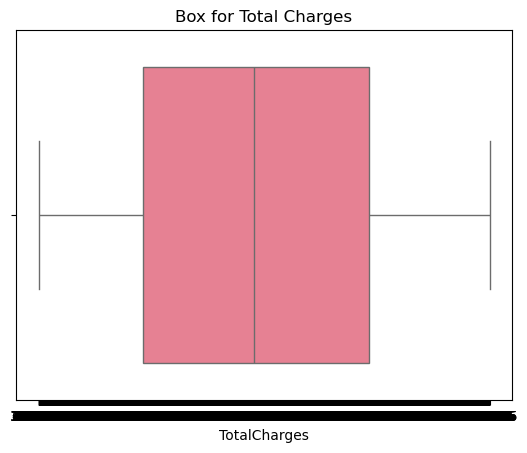

In [76]:
# boxplot for total charges
plt.figure()
sns.boxplot(x=df['TotalCharges'],palette='husl')
plt.title("Box for Total Charges")
plt.show()

- No outlier are present in Total charges column.

# **Encoding**
**Encoding is used to convert categorical data to numerical form.**

## **Types of Encoding**

### **1.Label Encoding**
- **The label encoding used for nominal data,where order does not matter,i.e label encoding is used for unorderd data.**
- **In label encoding the categories are assigned a nunique integer value it starting from 0.**
- import form **from sklearn.preprocessing import LabelEncoder**
### **2.One Hot Encoding**
- **In one hot encoding each unique category in the data is transformed into a seperate binary variable (0,1).this is also known as dummy variable.**
- **0 is stand for the unique category are not present.**
- **1 stands for the unique category are present.**                                                                  
- **One hot encoding is mostly used for ordered data.**

### **3.Ordinal Encoding**
- **In ordinal encoding the categorical data is mapped/assigned an integer value based on their order.**
- **It preserve the natiral order in the categories because of which it become easier for the model to interpret the categories based on their order.**


                tenure  MonthlyCharges
tenure          1.0000          0.2479
MonthlyCharges  0.2479          1.0000


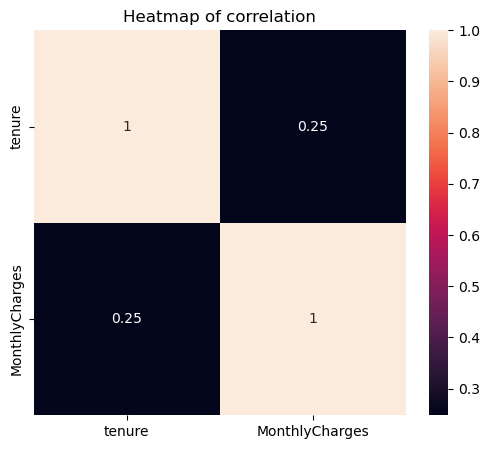

In [79]:
# correlation for numerical column
correlation=df[['tenure','MonthlyCharges']].corr() 
print(correlation)
plt.figure(figsize=(6,5))
sns.heatmap(correlation,annot=True)
plt.title('Heatmap of correlation')
plt.show()

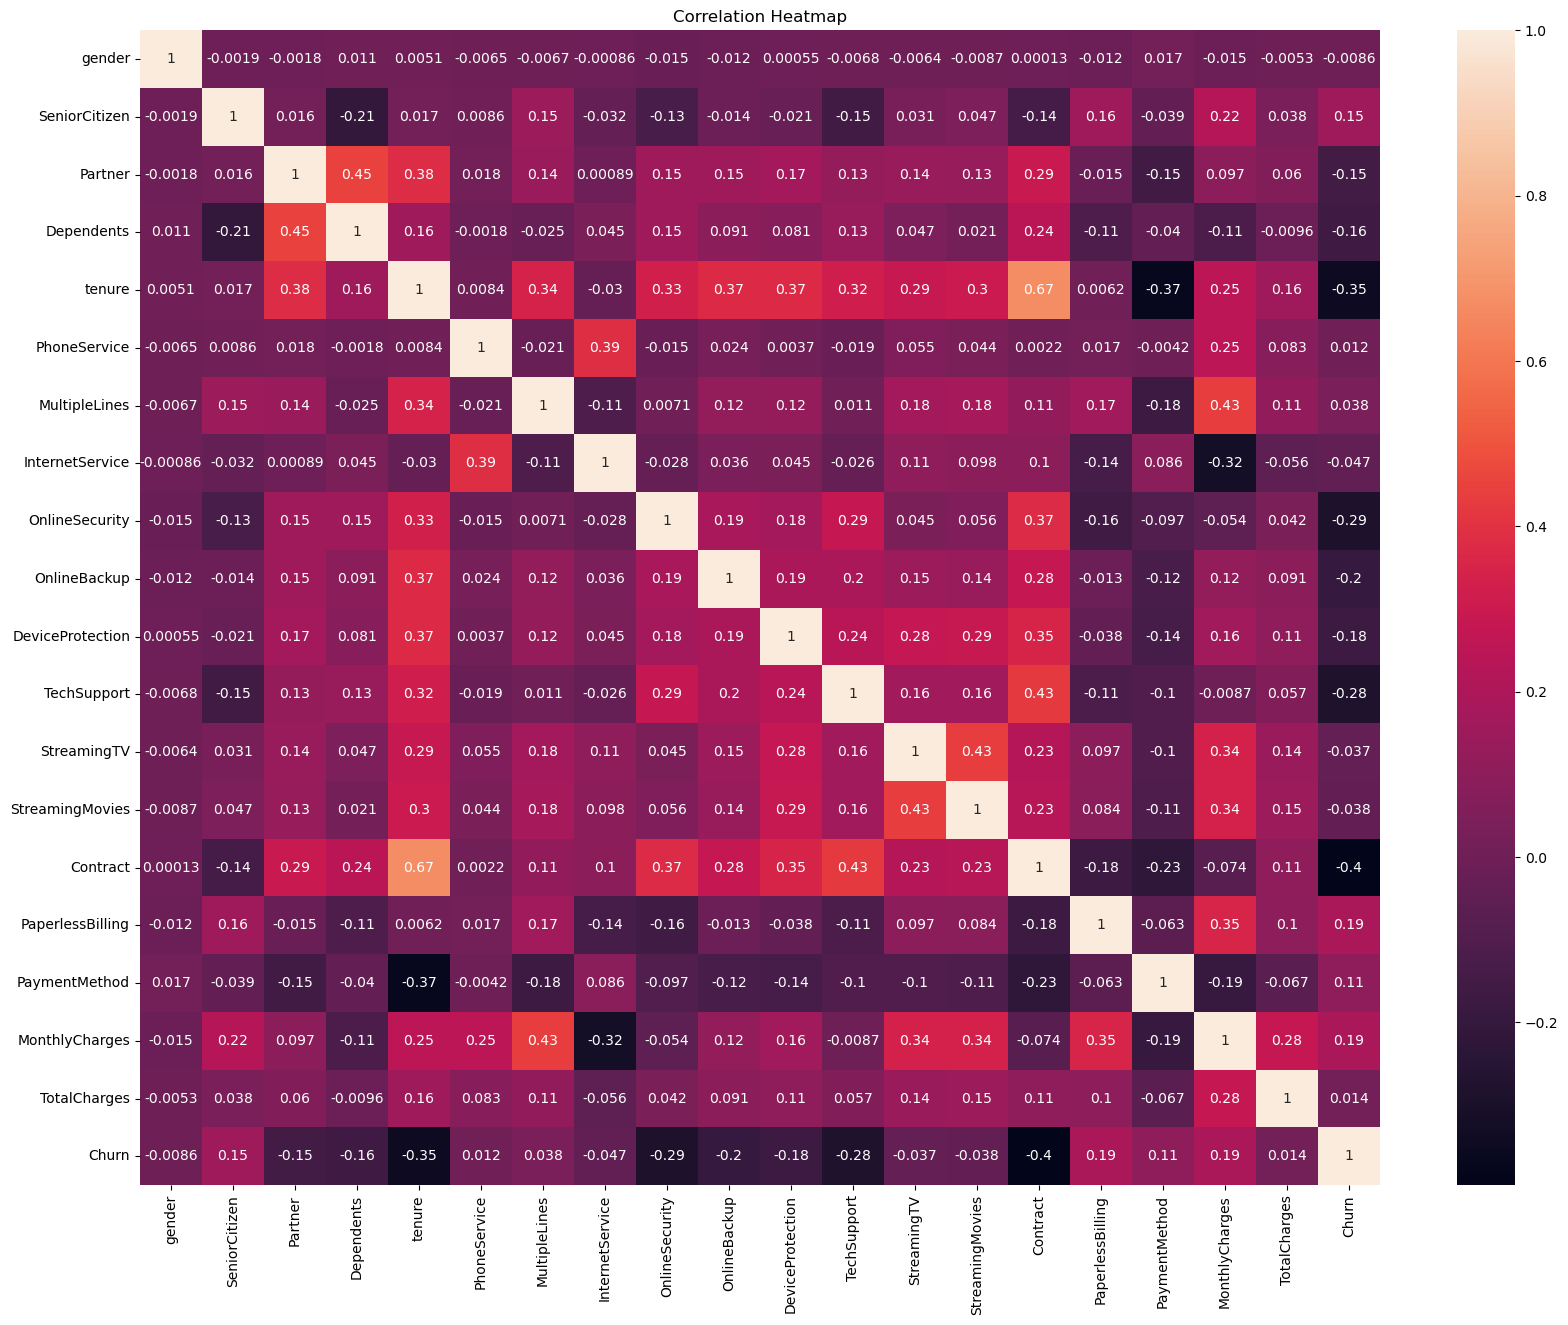

In [80]:
# label encoding to convert categorical columns into numerical

from sklearn.preprocessing import LabelEncoder
categorical_columns =['Contract','gender','InternetService','OnlineSecurity','DeviceProtection','OnlineBackup','TotalCharges','Churn','PaymentMethod','Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling'] 

le= LabelEncoder()

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])
corr_matrix = df.corr()

# heatmap
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True) 
plt.title("Correlation Heatmap") 
plt.show()  

- **This heatmap shows the how column are correlated with other columns.**
- **Every column is strongly correlated with itself i.e the coefficient of correlation is 1.**
- **The 'Contract' and 'tenure' this two features are strongly correlated to each other(0.65) ,i.e coefficient of correlation is closely 1.**
- **Some features are negatively correlated ,i.e the coefficient of correlation is close to -1 to 0 , one variable is increase then other variable is decreases.**
- **Some features are positively correlated , i.e the coefficient of correlation is close to 0 to 1.one variable is increase then other variable is also increases.**